##### The cell below is for you to keep track of the libraries used and install those libraries quickly
##### Ensure that the proper library names are used and the syntax of `%pip install PACKAGE_NAME` is followed

In [13]:
# %pip install pandas 
# %pip install matplotlib
# add commented pip installation lines for packages used as shown above for ease of testing
# the line should be of the format %pip install PACKAGE_NAME 

## **DO NOT CHANGE** the filepath variable
##### Instead, create a folder named 'data' in your current working directory and 
##### have the .csv file inside that. A relative path *must* be used when loading data into pandas

In [20]:
# Can have as many cells as you want for code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
filepath = "./data/catA_train.csv" 
# the initialised filepath MUST be a relative path to a folder named data that contains the parquet file

### **ALL** Code for machine learning and dataset analysis should be entered below. 
##### Ensure that your code is clear and readable.
##### Comments and Markdown notes are advised to direct attention to pieces of code you deem useful.

In [21]:
###...code...###
#Read data 
df = pd.read_csv(filepath)

# 1. Data Processing

## 1.1 Overview

In [22]:
print(df.info()) #check information about each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29182 entries, 0 to 29181
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   LATITUDE                             29062 non-null  float64
 1   LONGITUDE                            29062 non-null  float64
 2   AccountID                            29182 non-null  object 
 3   Company                              29182 non-null  object 
 4   SIC Code                             29182 non-null  float64
 5   Industry                             29182 non-null  object 
 6   8-Digit SIC Code                     29182 non-null  float64
 7   8-Digit SIC Description              29182 non-null  object 
 8   Year Found                           28748 non-null  float64
 9   Entity Type                          29182 non-null  object 
 10  Parent Company                       28668 non-null  object 
 11  Parent Country              

In [23]:
# Check number of missing values for each column
df.isna().sum()

LATITUDE                                 120
LONGITUDE                                120
AccountID                                  0
Company                                    0
SIC Code                                   0
Industry                                   0
8-Digit SIC Code                           0
8-Digit SIC Description                    0
Year Found                               434
Entity Type                                0
Parent Company                           514
Parent Country                           520
Ownership Type                             0
Company Description                        0
Square Footage                         29182
Company Status (Active/Inactive)           0
Employees (Single Site)                12403
Employees (Domestic Ultimate Total)       79
Employees (Global Ultimate Total)       2774
Sales (Domestic Ultimate Total USD)        0
Sales (Global Ultimate Total USD)          0
Import/Export Status                   22569
Fiscal Yea

In [24]:
#Check distirbution of numerical values
df.describe()

,LATITUDE,LONGITUDE,SIC Code,8-Digit SIC Code,Year Found,Square Footage,Employees (Single Site),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Is Domestic Ultimate,Is Global Ultimate
count,29062.000000,29062.000000,29182.000000,2.918200e+04,28748.000000,0.0,16779.000000,29103.000000,2.640800e+04,2.918200e+04,2.918200e+04,29182.000000,29182.000000
mean,1.320677,103.843324,6169.271160,6.169092e+07,2004.505913,NaN,36.856189,139.764182,6.994665e+03,7.520992e+08,3.931771e+09,0.500069,0.257248
std,0.043740,0.053757,1705.845535,1.705778e+07,13.464238,NaN,173.334420,1118.939249,4.539462e+04,1.019636e+10,2.184589e+10,0.500009,0.437125
min,1.238792,103.611319,132.000000,1.320000e+06,1819.000000,NaN,1.000000,1.000000,1.000000e+00,-1.502631e+08,1.000000e+00,0.000000,0.000000
25%,1.284665,103.831874,5084.000000,5.084000e+07,1997.000000,NaN,10.000000,4.000000,4.000000e+00,1.026308e+06,1.026308e+06,0.000000,0.000000
50%,1.309701,103.848989,6719.000000,6.719000e+07,2008.000000,NaN,16.000000,16.000000,1.500000e+01,2.606644e+06,3.259582e+06,1.000000,0.000000
75%,1.337889,103.865922,7311.000000,7.311000e+07,2014.000000,NaN,29.000000,60.000000,1.000000e+02,2.176969e+07,1.482258e+08,1.000000,1.000000
max,1.469800,104.003218,9721.000000,9.721990e+07,2023.000000,NaN,12000.000000,80000.000000,2.190000e+06,3.184764e+11,5.140000e+11,1.000000,1.000000


In [25]:
#Check first 5 rows to get a general sense of the dataset
df.head(5)

,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Entity Type,...,Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Import/Export Status,Fiscal Year End,Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate
0,1.285495,103.843852,LAKB2BID4559214,FRANK CONSULTING SERVICES PRIVATE LIMITED,7361.0,Employment Agencies,73610000.0,Employment agencies,2020.0,Subsidiary,...,NaN,2.209224e+06,4.637871e+06,NaN,NaN,FINDERS HOLDCO LIMITED,United Kingdom,FRANK RECRUITMENT GROUP PRIVATE LTD.,0.0,0.0
1,1.291294,103.827476,LAKB2BID7610849,NEW DESERT ORCHID SHIPPING PTE. LTD.,4449.0,"Water Transportation of Freight, Not Elsewhere...",44490000.0,Water transportation of freight,2015.0,Subsidiary,...,100.0,7.093536e+09,7.093536e+09,NaN,NaN,PETREDEC PTE. LIMITED,Singapore,NaN,0.0,0.0
2,1.300144,103.857517,LAKB2BID5461679,2MBAO BIOCELLBANK PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",1993.0,Subsidiary,...,4.0,1.026308e+06,1.026308e+06,NaN,NaN,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,2MBAO BIOCELLBANK PTE. LTD.,1.0,0.0
3,1.300785,103.791263,LAKB2BID5088529,NEWBLOOM PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Subsidiary,...,100.0,7.339898e+10,7.339898e+10,NaN,NaN,WILMAR INTERNATIONAL LIMITED,Singapore,WILMAR INTERNATIONAL LIMITED,0.0,0.0
4,1.298759,103.859430,LAKB2BID1268831,ASIA GREEN CAPITAL PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Parent,...,4.0,4.322130e+05,4.322130e+05,Exports,NaN,ASIA GREEN CAPITAL PTE. LTD.,Singapore,ASIA GREEN CAPITAL PTE. LTD.,1.0,1.0


### 1.2 Handling Missing Values
For columns with relatively few missing values, the corresponding rows are removed.

In [26]:
# removes rows without one of the following values:
df1 = df.dropna(subset=["LATITUDE", "LONGITUDE", "Employees (Domestic Ultimate Total)", "Employees (Global Ultimate Total)"])
df1.isna().sum()

LATITUDE                                   0
LONGITUDE                                  0
AccountID                                  0
Company                                    0
SIC Code                                   0
Industry                                   0
8-Digit SIC Code                           0
8-Digit SIC Description                    0
Year Found                               401
Entity Type                                0
Parent Company                           483
Parent Country                           489
Ownership Type                             0
Company Description                        0
Square Footage                         26278
Company Status (Active/Inactive)           0
Employees (Single Site)                11689
Employees (Domestic Ultimate Total)        0
Employees (Global Ultimate Total)          0
Sales (Domestic Ultimate Total USD)        0
Sales (Global Ultimate Total USD)          0
Import/Export Status                   20707
Fiscal Yea

#### 1.2.2 Feature Selection

Remove the following features:
1. Categorical features with mostly unique values, such as Account ID. Having many unique categories that cannot be combined in a reasonable manner means that this feature cannot contribute to the target value meaningfully.
This include: Account ID, Company, Company Description, 8-digit SIC Code, 8-digit SIC Description, Parent Company, Global Ultimate Company, Domestic Ultimate Company
2. Features with too many missing values
This include: Square Footage, Employees (Single Site), Import/Export Status, Fiscal Year End
3. Features that have high correlation with another feature
This include: 8-digit SIC Code (a repetition of SIC Code)

In [27]:
df1["Parent Company"].value_counts() #Too many unique values
df1["Parent Country"].value_counts() 
df1["Global Ultimate Company"].value_counts() #Too many unique values
df1["Global Ultimate Country"].value_counts()
df1["Domestic Ultimate Company"].value_counts() #Too many unique values
df1["8-Digit SIC Code"].value_counts() #Too many unique values

67190000.0    6196
67199901.0    1166
87420000.0    1051
65520000.0     560
50990000.0     538
              ... 
27549909.0       1
46139900.0       1
50849906.0       1
87310300.0       1
51590602.0       1
Name: 8-Digit SIC Code, Length: 2102, dtype: int64

In [28]:
columns = ['AccountID', 'Company', 'Industry', 'Company Description', 'Employees (Single Site)','Import/Export Status','Fiscal Year End','Square Footage', 'Parent Company', 'Global Ultimate Company', 'Domestic Ultimate Company', '8-Digit SIC Code', '8-Digit SIC Description']
df2 = df1.drop(columns = columns)
#remove the rest of the rows with missing values
df2 = df2.dropna()
#Consider only active companies
df2 = df2[df2['Company Status (Active/Inactive)'] == 'Active']
df2 = df2.drop(columns = ['Company Status (Active/Inactive)'])
df2.describe()
df2.isna().sum()

LATITUDE                               0
LONGITUDE                              0
SIC Code                               0
Year Found                             0
Entity Type                            0
Parent Country                         0
Ownership Type                         0
Employees (Domestic Ultimate Total)    0
Employees (Global Ultimate Total)      0
Sales (Domestic Ultimate Total USD)    0
Sales (Global Ultimate Total USD)      0
Global Ultimate Country                0
Is Domestic Ultimate                   0
Is Global Ultimate                     0
dtype: int64

In [29]:
# use of a correlation matrix to observe how variables in our dataset may be affected by others
numerical_df = df2.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()
correlation_df = pd.DataFrame(correlation_matrix)

correlation_df

,LATITUDE,LONGITUDE,SIC Code,Year Found,Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Is Domestic Ultimate,Is Global Ultimate
LATITUDE,1.000000,-0.047114,-0.087621,-0.025688,0.007725,-0.008617,0.005623,-0.009691,-0.016636,-0.039550
LONGITUDE,-0.047114,1.000000,0.024108,-0.006122,0.012137,0.004389,-0.007463,0.003628,0.003904,0.010934
SIC Code,-0.087621,0.024108,1.000000,0.198858,-0.021145,0.001013,-0.010541,-0.015263,0.034771,0.092243
Year Found,-0.025688,-0.006122,0.198858,1.000000,-0.044203,-0.028188,0.017349,-0.022695,0.097412,0.122330
Employees (Domestic Ultimate Total),0.007725,0.012137,-0.021145,-0.044203,1.000000,0.016121,0.015615,0.010377,-0.058653,-0.047715
Employees (Global Ultimate Total),-0.008617,0.004389,0.001013,-0.028188,0.016121,1.000000,-0.004174,0.648946,0.083194,-0.088096
Sales (Domestic Ultimate Total USD),0.005623,-0.007463,-0.010541,0.017349,0.015615,-0.004174,1.000000,0.109128,-0.056026,-0.042721
Sales (Global Ultimate Total USD),-0.009691,0.003628,-0.015263,-0.022695,0.010377,0.648946,0.109128,1.000000,0.073221,-0.101526
Is Domestic Ultimate,-0.016636,0.003904,0.034771,0.097412,-0.058653,0.083194,-0.056026,0.073221,1.000000,0.657799
Is Global Ultimate,-0.039550,0.010934,0.092243,0.122330,-0.047715,-0.088096,-0.042721,-0.101526,0.657799,1.000000


### 1.3 Ensure data consistency
<p>The features "Is domestic ultimate" and "Is global ultimate" are related. If a company is global ultimate, then it must be domestic ultimate.<p/>

In [30]:
error = df2[(df2["Is Domestic Ultimate"] == 0) & (df2["Is Global Ultimate"] == 1)]
error
# Data is consistent as no result is shown

,LATITUDE,LONGITUDE,SIC Code,Year Found,Entity Type,Parent Country,Ownership Type,Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Global Ultimate Country,Is Domestic Ultimate,Is Global Ultimate


### 1.4 Feature Engineering
The geographical features, latitude and longitude, may have correlation with the target value when both are considered at the same time. These two features will be used to create a new feature, "Location".
<p>First, we use Principle Component Analysis to create the new feature.</p>

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
coordinates = scaler.fit_transform(df2[['LATITUDE', 'LONGITUDE']])
sales = df2[['Sales (Domestic Ultimate Total USD)']]

pca = PCA(n_components=1)
df2['Location'] = pca.fit_transform(coordinates, sales)

df2.describe()

,LATITUDE,LONGITUDE,SIC Code,Year Found,Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Is Domestic Ultimate,Is Global Ultimate,Location
count,25393.000000,25393.000000,25393.000000,25393.000000,25393.000000,2.539300e+04,2.539300e+04,2.539300e+04,25393.000000,25393.000000,2.539300e+04
mean,1.320471,103.843436,6179.547552,2004.462490,139.348403,6.863797e+03,7.990131e+08,3.322419e+09,0.483913,0.288623,2.287515e-17
std,0.043684,0.053709,1697.098700,13.603706,1111.612537,4.473402e+04,1.085516e+10,1.870359e+10,0.499751,0.453131,1.023306e+00
min,1.238792,103.611319,132.000000,1819.000000,1.000000,1.000000e+00,-1.502631e+08,1.000000e+00,0.000000,0.000000,-1.525240e+00
25%,1.284665,103.831980,5084.000000,1997.000000,4.000000,4.000000e+00,1.026308e+06,1.026308e+06,0.000000,0.000000,-6.980003e-01
50%,1.308976,103.848989,6719.000000,2008.000000,15.000000,1.500000e+01,2.521607e+06,2.677662e+06,0.000000,0.000000,-4.535749e-01
75%,1.337750,103.865534,7021.000000,2015.000000,60.000000,1.000000e+02,2.036326e+07,1.045129e+08,1.000000,1.000000,3.796389e-01
max,1.469800,104.003218,9721.000000,2023.000000,80000.000000,2.190000e+06,3.184764e+11,5.140000e+11,1.000000,1.000000,3.642406e+00


We can also create the new feature with clustering to categorise the companies by the area they are in.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import davies_bouldin_score

param_grid = {'n_clusters': [2, 3, 4, 5, 6], 'random_state': [42, 56, 29, 103, 109]}  # You can add more values for 'random_state'

best_score = -1
best_params = {}

for params in ParameterGrid(param_grid):
    kmeans = KMeans(**params)
    kmeans.fit(coordinates, sales)
    labels = kmeans.labels_
    score = davies_bouldin_score(coordinates, sales)

    if score > best_score:
        best_score = score
        best_params = params

print("Best Parameters:", best_params)

#Best params are 'n_clusters': 2, 'random_state': 42

In [32]:
from sklearn.cluster import KMeans
#Use the parameters from the GridSearch to conduct pca
kmeans = KMeans(n_clusters = 2, random_state = 42)
kmeans.fit(coordinates, sales)
df2['Area'] = kmeans.labels_

/Users/laneyzhang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### 1.5 Handling outliers
This section include the handling of rare occurence in categorical data as well as outliers in numerical data.
<p> Features with such data points are: <p/>
<p> SIC Code, Parent Country, Global Ultimate Country. <p/>

In [33]:
# Find the frequency of each category for each categorical feature
sic_code_frequency = df2['SIC Code'].value_counts()
pc_frequency = df2['Parent Country'].value_counts()
guc_frequency = df2['Global Ultimate Country'].value_counts()

threshold = 1

# Identify SIC Codes with frequency below the threshold
low_frequency_sic_codes = sic_code_frequency[sic_code_frequency < 10].index
low_frequency_pc = pc_frequency[pc_frequency < 30].index
low_frequency_guc = guc_frequency[guc_frequency < 50].index

# Replace these low-frequency SIC Codes with a common label "Others"
df3 = df2.copy()
df3['SIC Code'] = df2['SIC Code'].replace(low_frequency_sic_codes, 'Others', inplace = False)
df3['Parent Country'] = df2['Parent Country'].replace(low_frequency_pc, 'Others')
df3['Global Ultimate Country'] = df2['Global Ultimate Country'].replace(low_frequency_guc, 'Others')

In [34]:
# Convert SIC code to string type
df3['SIC Code'] = df3['SIC Code'].astype(str)

Based on the Box Plots of numerical features (Employees (Domestic Ultimate Total), 
                                              Employees (Global Ultimate Total), 
                                              Sales (Domestic Ultimate Total USD), 
                                              Sales (Global Ultimate Total USD)), 
there are some outliers in the dataset, where some companies have scale or sales much greater than the rest. 
<P>Outliers may affect the result of the model, and such effect maybe undesireable as the vast majority of the population of companies do not have as large scale as these outliers. Outliers can be removed from the dataset.<P/>

In [144]:
df4 = df3.sort_values('Sales (Global Ultimate Total USD)')[:-8]
df4 = df4.sort_values('Sales (Domestic Ultimate Total USD)')[:-25]

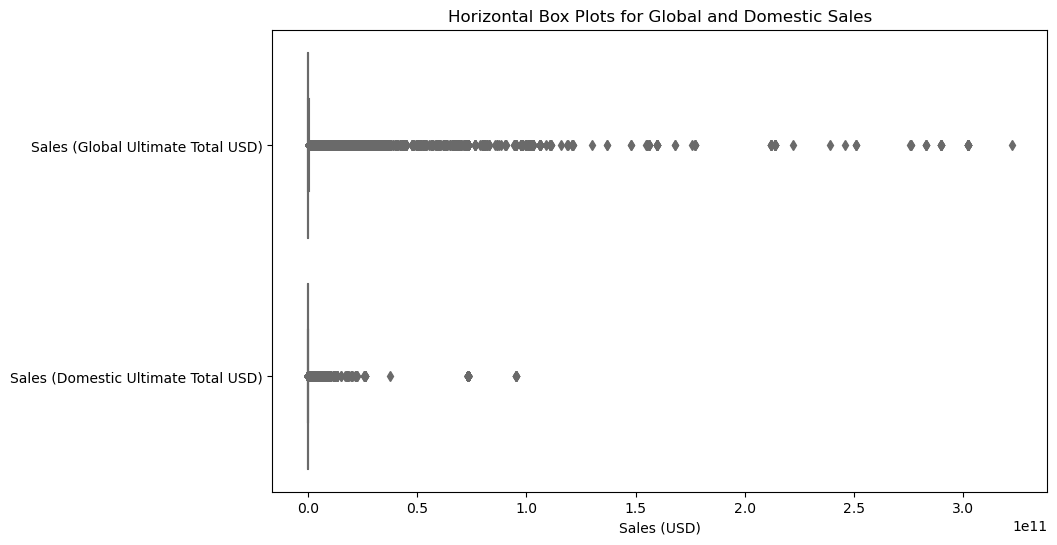

In [145]:
#Plot to show effect of removing outliers
sales_columns = ['Sales (Global Ultimate Total USD)', 'Sales (Domestic Ultimate Total USD)']
sales_data = df4[sales_columns]

# Creating horizontal box plots using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=sales_data, orient='h', palette="Set3")
plt.title('Horizontal Box Plots for Global and Domestic Sales')
plt.xlabel('Sales (USD)')
plt.show()

In [153]:
df4 = df4.sort_values('Employees (Domestic Ultimate Total)')[:-2]
df4 = df4.sort_values('Employees (Global Ultimate Total)')[:-2]

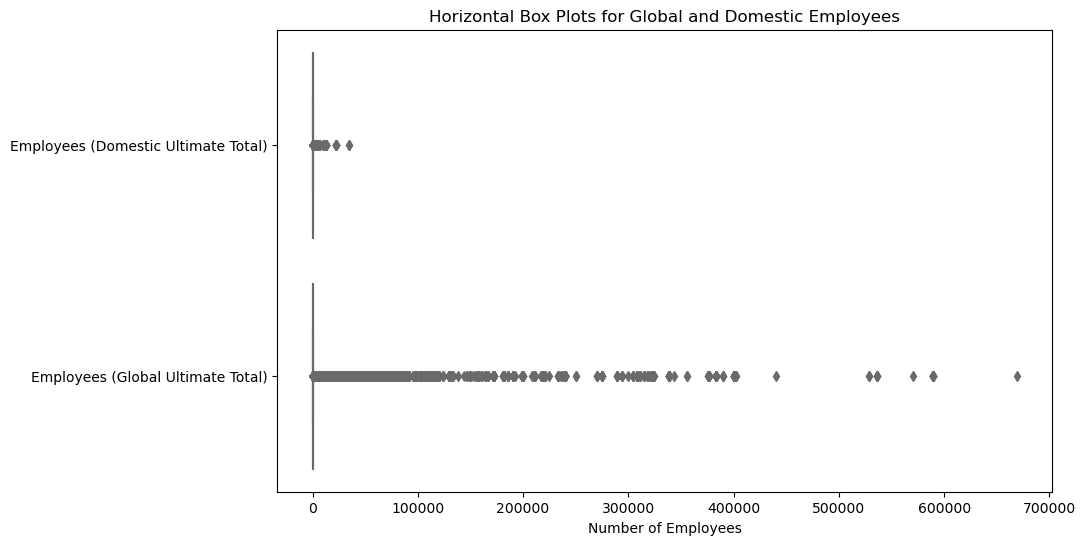

In [154]:
employees_columns = [ 'Employees (Domestic Ultimate Total)', 'Employees (Global Ultimate Total)']
employees_data = df4[employees_columns]
# Creating horizontal box plots using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=employees_data, orient='h', palette="Set3")
plt.title('Horizontal Box Plots for Global and Domestic Employees')
plt.xlabel('Number of Employees')
plt.show()

### 1.2.6  Handle Imbalanced class
There are two class features: Is Domestic Ultimate and Is Global Ultimate. No severe imbalance in distribution is found in these two features.

In [155]:
print(df4['Is Global Ultimate'].value_counts())
print(df4['Is Domestic Ultimate'].value_counts())

0.0    18020
1.0     7329
Name: Is Global Ultimate, dtype: int64
0.0    13078
1.0    12271
Name: Is Domestic Ultimate, dtype: int64


## 2. EDA
We will now proceed to analyze and visualize a subset of our data to gain some rough insight into how inputs in our data are related to our outputs.

### 2.1 Plotting Graphs



2.1.1Box Plots 

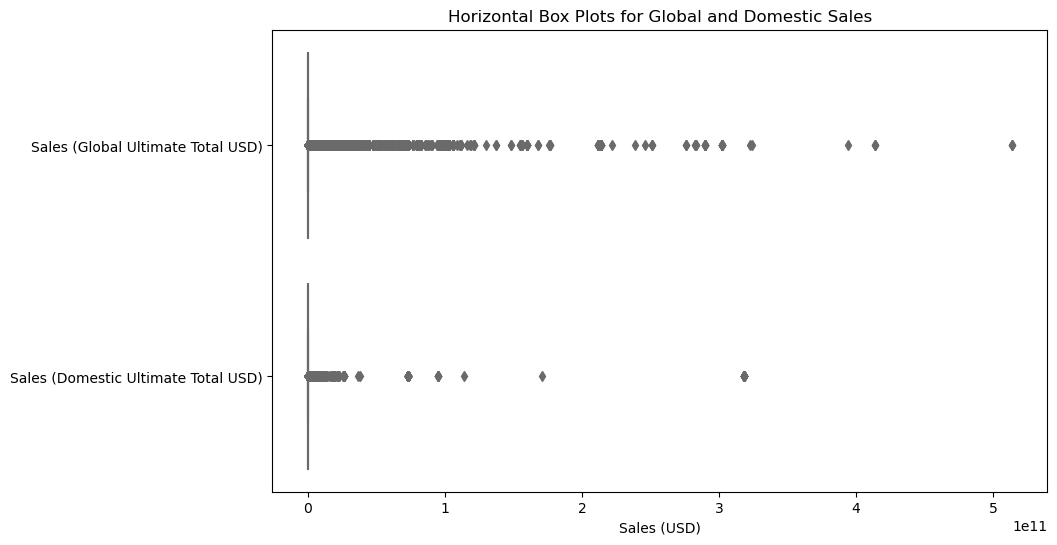

In [49]:
sales_columns = ['Sales (Global Ultimate Total USD)', 'Sales (Domestic Ultimate Total USD)']
sales_data = df3[sales_columns]

# Creating horizontal box plots using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=sales_data, orient='h', palette="Set3")
plt.title('Horizontal Box Plots for Global and Domestic Sales')
plt.xlabel('Sales (USD)')
plt.show()

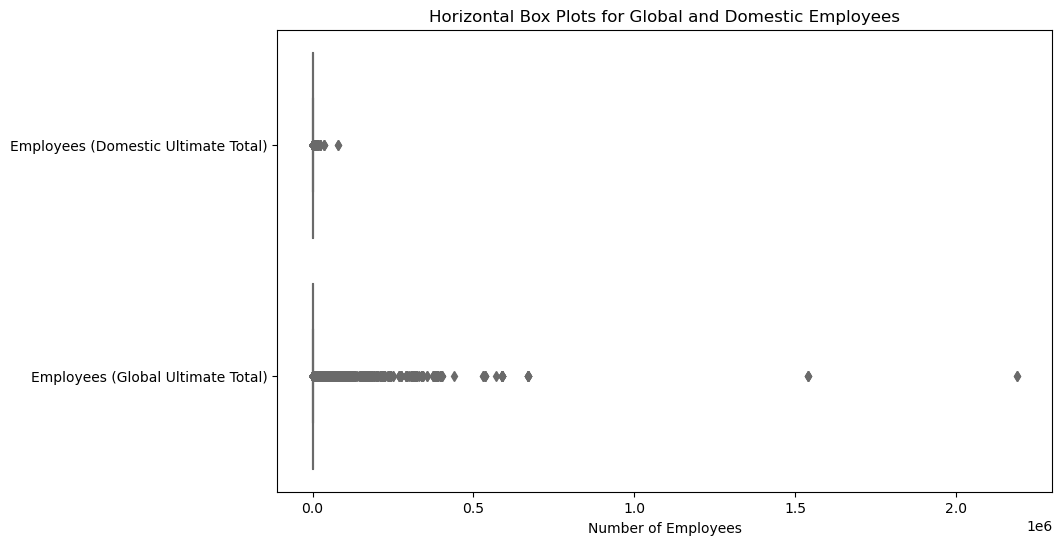

In [53]:
employees_columns = [ 'Employees (Domestic Ultimate Total)', 'Employees (Global Ultimate Total)']
employees_data = df3[employees_columns]
# Creating horizontal box plots using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=employees_data, orient='h', palette="Set3")
plt.title('Horizontal Box Plots for Global and Domestic Employees')
plt.xlabel('Number of Employees')
plt.show()

2.1.2 Histogram

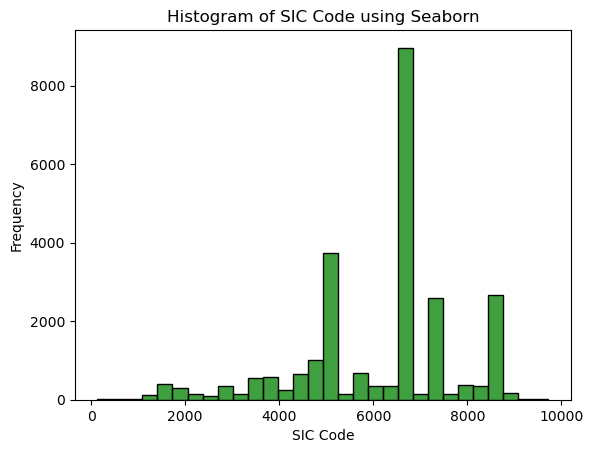

In [41]:
data = df2['SIC Code'] #df2 is used as SIC code is in string type in df3 and above

# Plot histogram using Seaborn
sns.histplot(data, bins=30, kde=False, color='green')
plt.xlabel('SIC Code')
plt.ylabel('Frequency')
plt.title('Histogram of SIC Code using Seaborn')
plt.show()

2.1.3 Scatter Plots

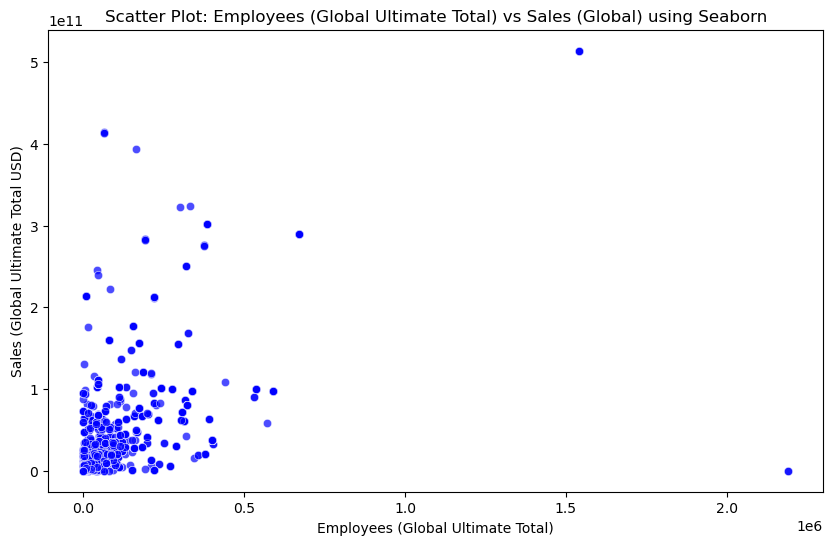

In [156]:
data = df3[['Employees (Global Ultimate Total)', 'Sales (Global Ultimate Total USD)']]

# Plot scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Employees (Global Ultimate Total)', y='Sales (Global Ultimate Total USD)', data=data, color='blue', alpha=0.7)
plt.xlabel('Employees (Global Ultimate Total)')
plt.ylabel('Sales (Global Ultimate Total USD)')
plt.title('Scatter Plot: Employees (Global Ultimate Total) vs Sales (Global) using Seaborn')
plt.show()

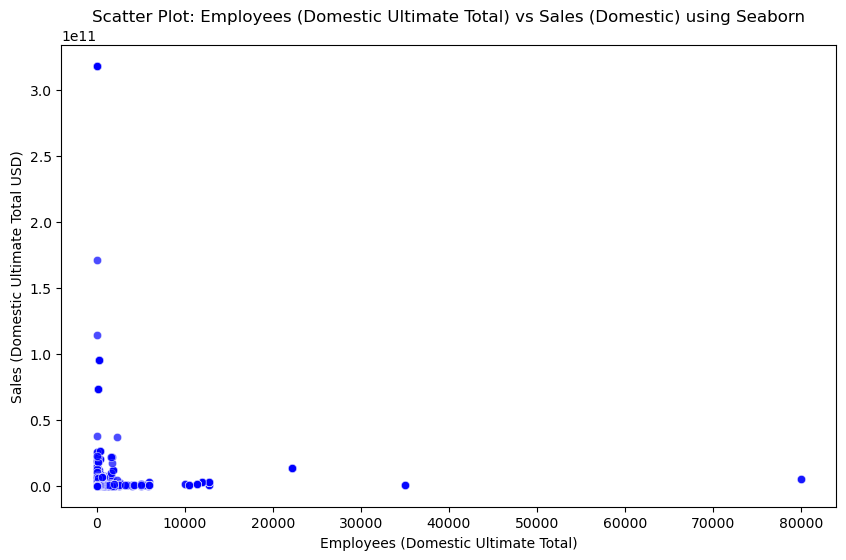

In [157]:
data = df3[['Employees (Domestic Ultimate Total)', 'Sales (Domestic Ultimate Total USD)']]

# Plot scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Employees (Domestic Ultimate Total)', y='Sales (Domestic Ultimate Total USD)', data=data, color='blue', alpha=0.7)
plt.xlabel('Employees (Domestic Ultimate Total)')
plt.ylabel('Sales (Domestic Ultimate Total USD)')
plt.title('Scatter Plot: Employees (Domestic Ultimate Total) vs Sales (Domestic) using Seaborn')
plt.show()

2.1.4 Bar Charts

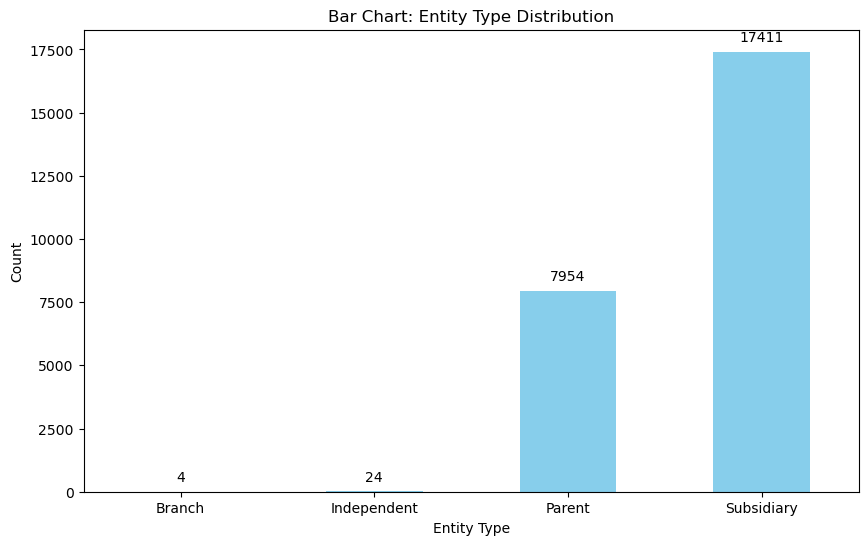

In [158]:
data = df3['Entity Type']

# Create a bar chart with Matplotlib
plt.figure(figsize=(10, 6))
ax = data.value_counts().sort_index().plot(kind='bar', color='skyblue')

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', rotation=0)

# Set x-axis label rotation to horizontal
plt.xticks(rotation=0)

plt.xlabel('Entity Type')
plt.ylabel('Count')
plt.title('Bar Chart: Entity Type Distribution')

plt.show()

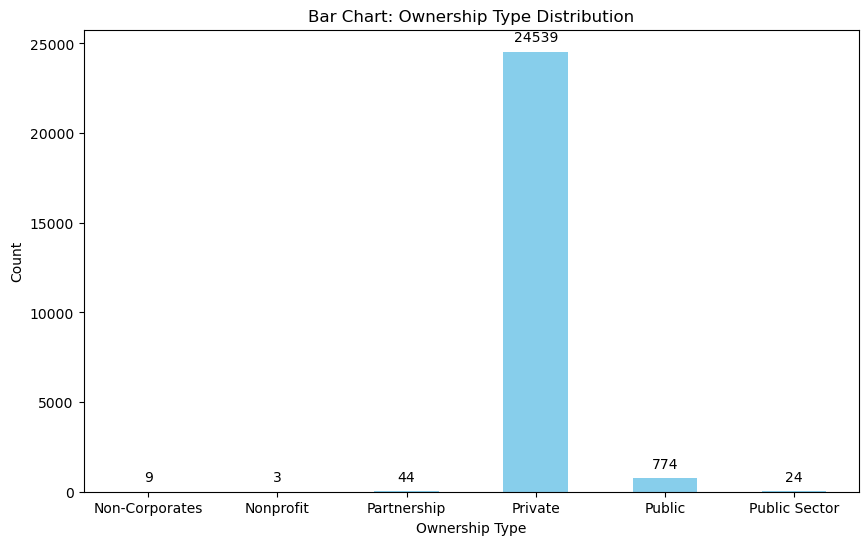

In [159]:
data = df3['Ownership Type']

# Create a bar chart with Matplotlib
plt.figure(figsize=(10, 6))
ax = data.value_counts().sort_index().plot(kind='bar', color='skyblue')

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', rotation=0)

# Set x-axis label rotation to horizontal
plt.xticks(rotation=0)

plt.xlabel('Ownership Type')
plt.ylabel('Count')
plt.title('Bar Chart: Ownership Type Distribution')

plt.show()

2.1.5 Pie Charts

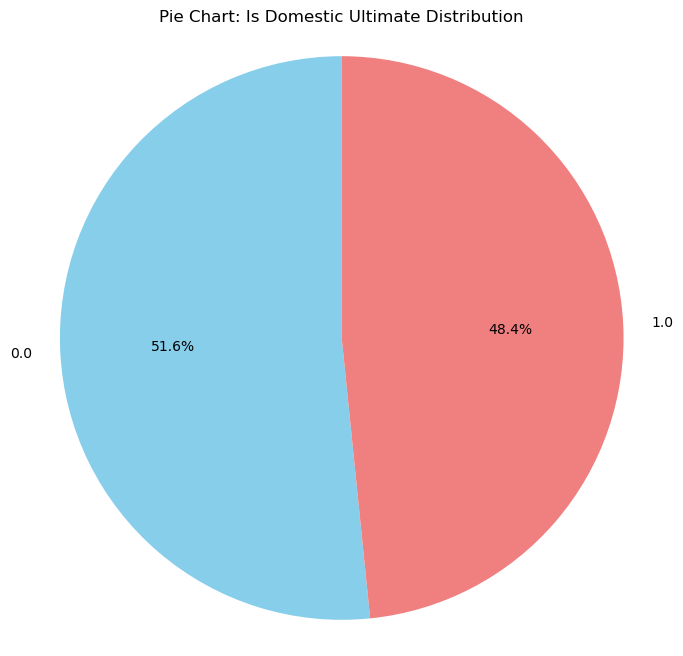

In [160]:

data = df3['Is Domestic Ultimate'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Pie Chart: Is Domestic Ultimate Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

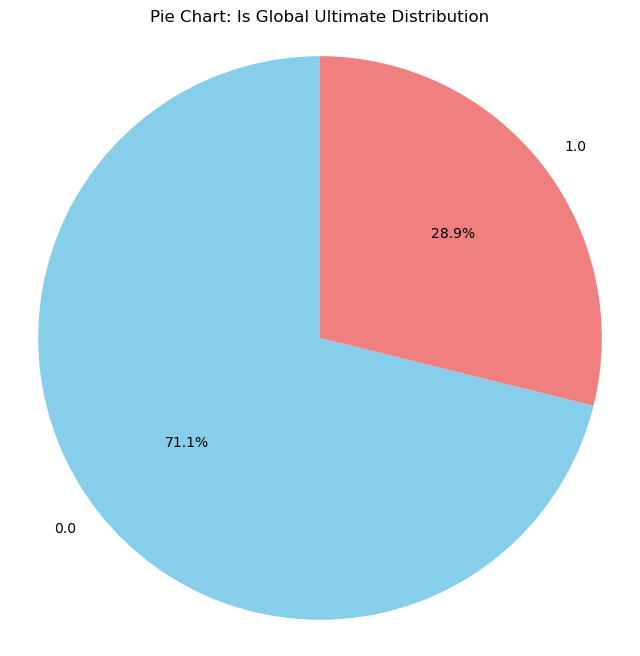

In [161]:
data = df3['Is Global Ultimate'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Pie Chart: Is Global Ultimate Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

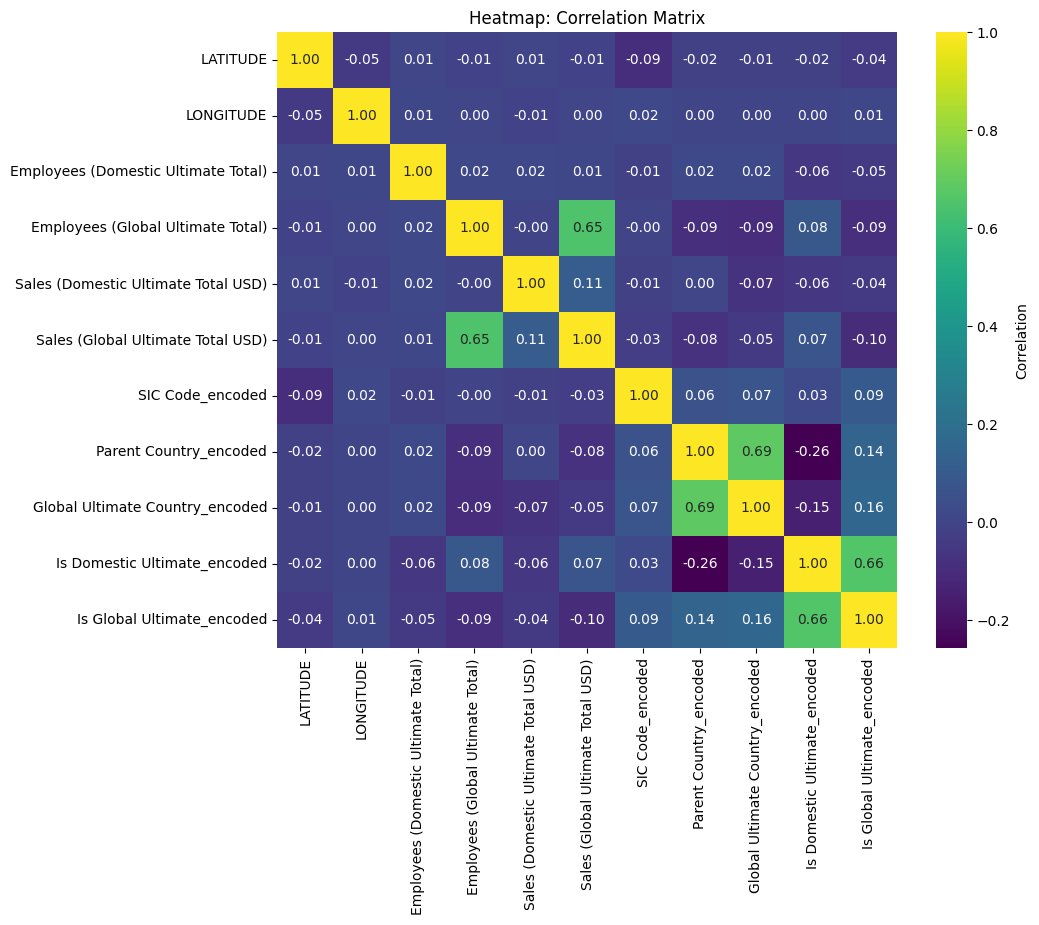

In [ ]:
'''
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, cmap='viridis', annot=True, fmt=".2f", cbar_kws={'label': 'Correlation'})
plt.title('Heatmap: Correlation Matrix')
plt.show()'''
#uncomment after merging with Jerry's version which contains correlation matrix

# 3. Preparing data for training

## The cell below is **NOT** to be removed
##### The function is to be amended so that it accepts the given input (dataframe) and returns the required output (list). 
##### It is recommended to test the function out prior to submission
-------------------------------------------------------------------------------------------------------------------------------
##### The hidden_data parsed into the function below will have the same layout columns wise as the dataset *SENT* to you
##### Thus, ensure that steps taken to modify the initial dataset to fit into the model are also carried out in the function below

In [ ]:
def testing_hidden_data(hidden_data: pd.DataFrame) -> list:
    '''DO NOT REMOVE THIS FUNCTION.

The function accepts a dataframe as input and return an iterable (list)
of binary classes as output.

The function should be coded to test on hidden data
and should include any preprocessing functions needed for your model to perform. 
    
All relevant code MUST be included in this function.'''

    result = [] 
    return result

##### Cell to check testing_hidden_data function

In [ ]:
# This cell should output a list of predictions.
test_df = pd.read_csv(filepath)
test_df = test_df.drop(columns=['Sales (Domestic Ultimate Total USD)'])
print(testing_hidden_data(test_df))

### Please have the filename renamed and ensure that it can be run with the requirements above being met. All the best!